In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install opencv-python-headless

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def read_file(filename):
    img=cv2.imread(filename)
    img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.show()
    
    return img

# create edge mask

In [5]:
def edge_mask(img, line_size,blur_value):
    gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    gray_blur=cv2.medianBlur(gray, blur_value)

    edges=cv2.adaptiveThreshold(gray_blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,
                                cv2.THRESH_BINARY,line_size,blur_value)
    
    return edges

# reduce the color palette

In [6]:
def color_quantization(img,k):
    data=np.float32(img).reshape((-1,3))

    criteria=(cv2.TERM_CRITERIA_EPS+cv2.TERM_CRITERIA_MAX_ITER,20,0.001)

    ret,label,center=cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center=np.uint8(center)
    
    result=center[label.flatten()]
    result=result.reshape(img.shape)

    return result

## combine edge mask with the quantiz image


In [7]:
def cartoonize_image(org_img):
    img = np.copy(org_img)
    line_size, blur_value = 11, 7
    edges = edge_mask(img, line_size, blur_value)

    plt.imshow(edges, cmap="binary")
    plt.axis('off')
    plt.title('Edges')
    plt.show()

    img = color_quantization(img, k=9)

    plt.imshow(img)
    plt.axis('off')
    plt.title('Quantized Image')
    plt.show()

    blurred = cv2.bilateralFilter(img, d=3, sigmaColor=200, sigmaSpace=200)
    
    plt.imshow(blurred)
    plt.axis('off')
    plt.title('Blurred Image')
    plt.show()

    cartoon = cv2.bitwise_and(blurred, blurred, mask=edges)

    # Displaying the original and cartoon images side by side
    fig, axs = plt.subplots(1, 2, figsize=(10, 5))

    axs[0].imshow(org_img)
    axs[0].set_title('Original Image')
    axs[0].axis('off')

    axs[1].imshow(cartoon)
    axs[1].set_title('Cartoon Image')
    axs[1].axis('off')

    plt.show()

In [8]:
pip install opencv-python matplotlib tkinter


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tkinter (from versions: none)
ERROR: No matching distribution found for tkinter

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tkinter import Tk


In [10]:

from tkinter.filedialog import askopenfilename

Please select an image file to cartoonize.


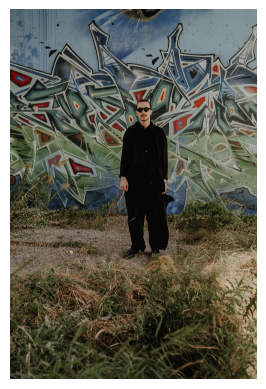

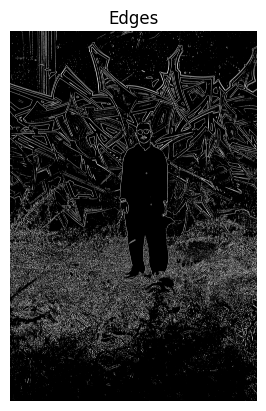

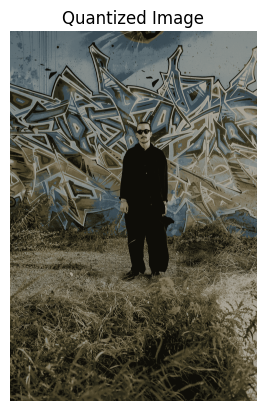

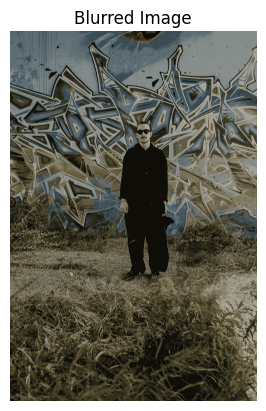

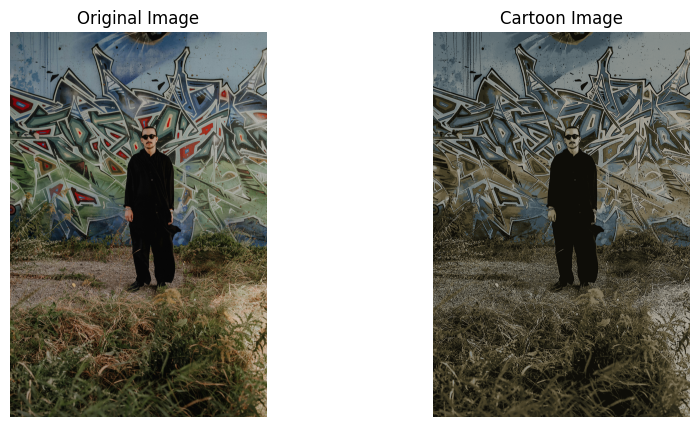

In [11]:
def upload_image():
    Tk().withdraw()  # Close the root window
    file_path = askopenfilename(filetypes=[("Image files", "*.png;*.jpg;*.jpeg;*.bmp;*.avif")])
    if file_path:
        return file_path
    else:
        print("No file selected.")
        return None

# Main script
while True:
    print("Please select an image file to cartoonize.")
    file_path = upload_image()  # Prompt user to select an image
    if file_path:
        img = read_file(file_path)
        cartoonize_image(img)
    else:
        print("Operation canceled or no file selected.")
    
    another = input("Do you want to cartoonize another image? (y/n): ").strip().lower()
    if another != 'y':
        break